# Course Title: GCIS-523-0B: Statistical Computing
# Instructor: Marwah Obaid
# Student Name - Kunga Nyima Gurung
# Student ID - 3181275
# University ID - gurung019@gannon.edu
# Project - Statical Analysis and Data processing on predicting Student Performance

# 1.DATA UNDERSTANDING AND CLEANING

### Importing the necessary libraries like pandas, numpy, seaborn, matplotlib,sklearn,Linear regression, etc

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

### import pandas as pd: 
This adds the name pd to the pandas library. It is used to manipulate and analyze data, especially when working with tabular data (DataFrames).
### import numpy as np:
This adds the alias np to the numpy library, which is used for numerical computation. It is employed for mathematical computations and array manipulation.
### import matplotlib.pyplot as plt: 
This imports matplotlib.pyplot, a tool for making plots and visualizations, including scatter plots, graphs, and histograms.
### import seaborn as sns: 
Imports seaborn, a Matplotlib-based statistical data visualization package that makes it easier to create visually appealing and educational plots.
### from sklearn.model_selection import train_test_split: 
This function divides your dataset into two sets—one for model training and one for testing—is imported from Scikit-learn.
### from the preprocessing sklearn import LabelEncoder: 
imports Scikit-learn's LabelEncoder, a tool for encoding categorical variables (such strings or labels) as numerical values.
### from the linear model in sklearn import LinearRegression:
To build and train a linear regression model, import the Scikit-learn LinearRegression class.
### from sklearn.metrics import r2_score, mean_squared_error: 
This imports the r2_score and mean_squared_error functions. These measures are employed to assess a regression model's performance.
### import warnings: 
To handle warning messages, import the warnings module.

## Reading the csv file to Dataframe

In [94]:
df = pd.read_csv('Student_Performance.csv')

In [95]:
print("\nThe number of rows and columns in the dataset are:") 
df.shape


The number of rows and columns in the dataset are:


(10000, 6)

The data frame has 10000 rows and six columns

### Printig the first 5 data of the dataframe

In [96]:
df.head()

Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


### Perspectives on Data Quality: 
Missing Values Each column's non-null count of 10,000 indicates that there are no missing values in your dataset. This means that every feature has access to all 10,000 data points, which is fantastic because it removes the requirement for handling missing data or imputation.
Types of Data:
There are 4 integer columns (Hours Studied, Previous Scores, Sleep Hours, and Sample Question Papers Practiced), which are numeric features suitable for most machine learning algorithms.
The dataset is well-structured for regression tasks, and the continuous target variable is represented by one float column (Performance Index).
Since the first categorical column (Extracurricular Activities) is an object type, machine learning algorithms cannot use it until it has been encoded.


In [98]:
df.describe()

Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.000000   
50%         5.000000        69.000000      7.000000   
75%         7.000000        85.000000      8.000000   
max         9.000000        99.000000      9.000000   

       Sample Question Papers Practiced  Performance Index  
count                      10000.000000       10000.000000  
mean                           4.583300          55.224800  
std                            2.867348          19.212558  
min                            0.000000          10.000000  
25%                            2.000000          40.000000  
50%                            5.000000          55.000000  
75%                            7.000000          71.000000  
max                            9.000000         100.000000

The data shows interesting trends, such as a moderate correlation between the hours studied, the previous scores, and the number of sample papers practiced. For instance, students who studied longer or practiced more papers tend to have higher performance indices, but the standard deviation indicates significant variation in performance despite similar efforts.
Sleep seems to be somewhat consistent, with most students averaging between 5 and 8 hours per night. It might be worth exploring whether there's any correlation between sleep and performance.

## Handling the unwanted and missing values

In [99]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

Repercussions:
There is no need to impute (fill in) any missing data or remove any rows or columns because of missing values because there are none.
Ready for Modeling: By removing one of the most frequent preprocessing procedures, the lack of missing data prepares the data for model training.
Data Integrity: The dataset is clean if there are no missing values, which is crucial for building strong machine learning models.


In [100]:
df.duplicated().sum()

127

The dataframe has 127 duplicate rows.Because duplicates might skew the findings by over-representing particular observations, they can have an impact on model training.
Duplicates should be appropriately handled or eliminated before moving on to analysis or model construction.

In [101]:
df = df.drop_duplicates()

In [102]:
print("\nThe number of rows after removing the duplicate values is:") 
df.shape


The number of rows after removing the duplicate values is:


(9873, 6)

It appears that your dataset has shrunk from 10,000 rows to 9,873 rows after the duplicate rows were eliminated. This indicates that 127 duplicate rows were effectively eliminated from the original dataset.

Justification:
10,000 rows were initially present.
9,873 rows after duplicates are eliminated
There are 10,000 - 9,873 = 127 duplicate rows.


## Detecting the outliers in the data frame using box plot and Statistical Method for Detecting Outliers (IQR Method)

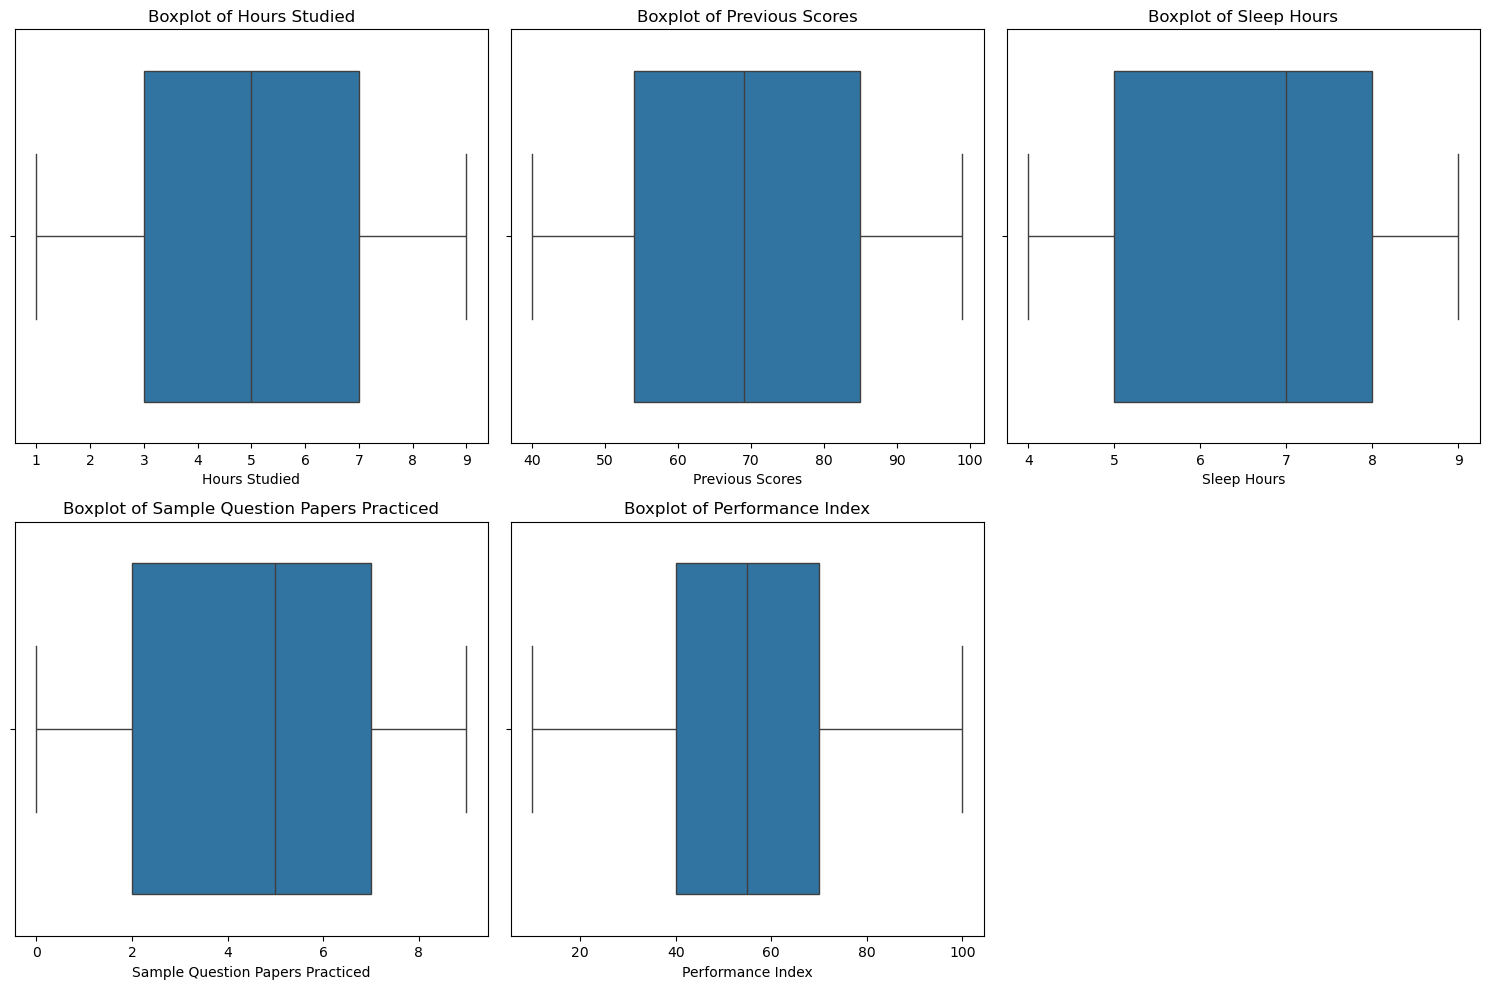

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns
numeric_columns = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']

# Create boxplots for each numeric column
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [104]:
# Function to identify outliers using IQR method
def detect_outliers_iqr(df, columns):
    outliers = {}
    for column in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find the outliers
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
    return outliers

# Detect outliers for numeric columns
outliers = detect_outliers_iqr(df, numeric_columns)

# Print the number of outliers detected for each feature
for column, outlier_data in outliers.items():
    print(f"Number of outliers in {column}: {len(outlier_data)}")


Number of outliers in Hours Studied: 0
Number of outliers in Previous Scores: 0
Number of outliers in Sleep Hours: 0
Number of outliers in Sample Question Papers Practiced: 0
Number of outliers in Performance Index: 0


According to the box plot and IQR approach, no outliers were found in the dataset, which is fantastic because it indicates that the data is already well-behaved and free of extreme or aberrant values that could distort the research.
This suggests that your dataset is free of outliers and missing values, both of which you have already verified.

## Encoding the categorical value

In [105]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Encode the 'Extracurricular Activities' column
df['Extracurricular Activities'] = encoder.fit_transform(df['Extracurricular Activities'])

In [106]:
df.head()

Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                           1            9   
1              4               82                           0            4   
2              8               51                           1            7   
3              5               52                           1            5   
4              7               75                           0            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0

### Saving the cleaned csv file

In [107]:
# Save the updated DataFrame to a new CSV file (optional)
df.to_csv('Cleaned_csv_file.csv', index=False)

## Calculating the Correlation Matrix

In [108]:
# Calculate the correlation matrix for all features and the target variable
correlation_matrix = df.corr()

# Print the correlation of each feature with the target variable (Performance Index)
print("Correlation with Performance Index:")
print(correlation_matrix['Performance Index'])


Correlation with Performance Index:
Hours Studied                       0.375332
Previous Scores                     0.915135
Extracurricular Activities          0.026075
Sleep Hours                         0.050352
Sample Question Papers Practiced    0.043436
Performance Index                   1.000000
Name: Performance Index, dtype: float64


### Important Takeaways for correlation between the x variables and the target y variable

#### Prior Scores (0.915135): 
The Performance Index, the target variable, and this attribute have the strongest positive association. A very strong positive link is shown by a correlation of 0.92. This indicates that one of the most crucial features for forecasting the performance index is probably Previous Scores. The performance index typically rises in tandem with an increase in Previous Scores.
#### Hours Studied (0.375332): 
The Performance Index (0.38), and this attribute have a moderately positive link. This implies that although study hours have a beneficial impact on performance, it is not as significant as Previous Scores. Although the association is weaker, increasing the number of hours studied does improve the performance index.
#### Extracurricular Activities (0.026075): 
The Performance Index and this attribute have a very weak positive association (0.03). This suggests that the performance index is not significantly impacted by extracurricular activities. Unless there is an indirect effect or non-linear link that we haven't yet identified, it might not be a particularly helpful characteristic for the model.
#### Sleep Hours (0.050352): 
The association between sleep hours and the performance measure is likewise quite poor (0.05), indicating that sleep hours hardly affect anything. Since this feature doesn't seem to add much to the prediction, it's worth thinking about whether you want to preserve it or not.
#### Practiced Sample Question Papers (0.043436):
This attribute shows a very weak positive connection (0.04) with the Performance Index, just like Sleep Hours and Extracurricular Activities. This implies that the quantity of rehearsed question papers is not a reliable indicator and does not have a substantial correlation with the performance index.

## The correlation Matrix Table

In [109]:
# Calculate the correlation matrix for all feature columns
correlation_matrix = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 
                         'Sleep Hours', 'Sample Question Papers Practiced']].corr()

# Display the correlation matrix
print(correlation_matrix)


                                  Hours Studied  Previous Scores  \
Hours Studied                          1.000000        -0.010676   
Previous Scores                       -0.010676         1.000000   
Extracurricular Activities             0.004899         0.009534   
Sleep Hours                            0.002131         0.007975   
Sample Question Papers Practiced       0.015740         0.008719   

                                  Extracurricular Activities  Sleep Hours  \
Hours Studied                                       0.004899     0.002131   
Previous Scores                                     0.009534     0.007975   
Extracurricular Activities                          1.000000    -0.024008   
Sleep Hours                                        -0.024008     1.000000   
Sample Question Papers Practiced                    0.013839     0.004907   

                                  Sample Question Papers Practiced  
Hours Studied                                             0

## Visualizing the Correlation using heat map

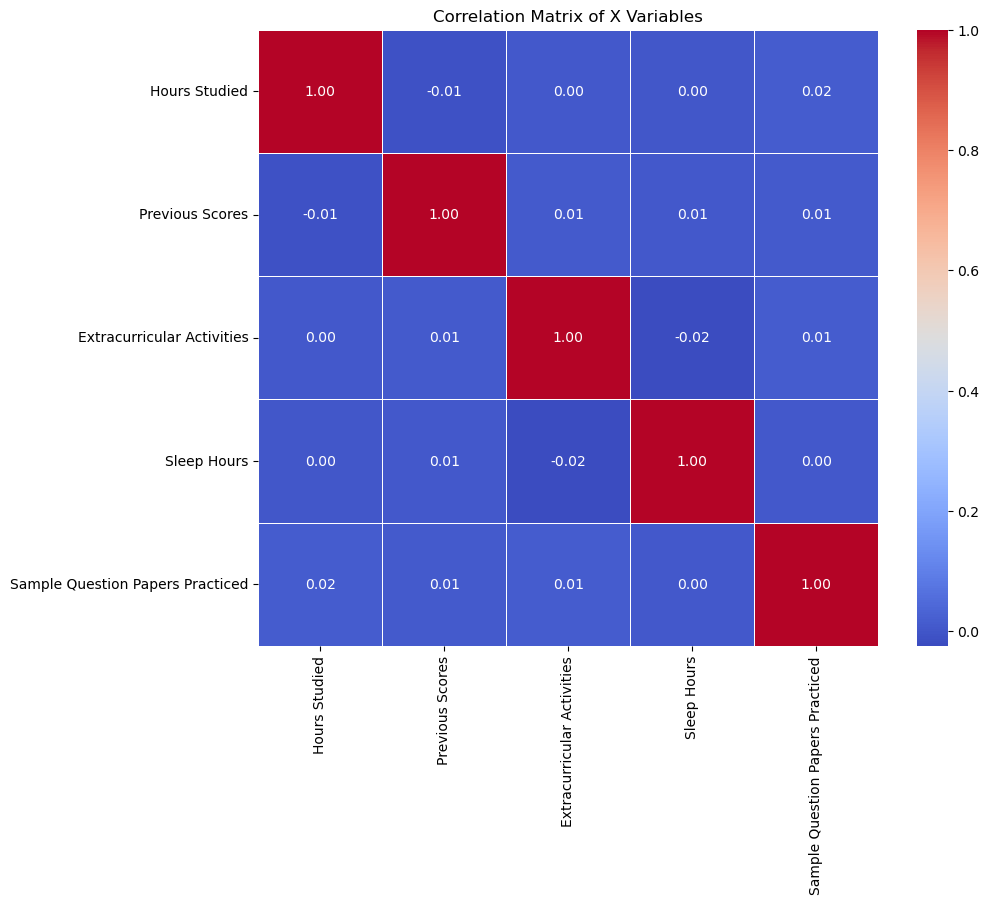

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and show the plot
plt.title('Correlation Matrix of X Variables')
plt.show()


### Scatter Plot

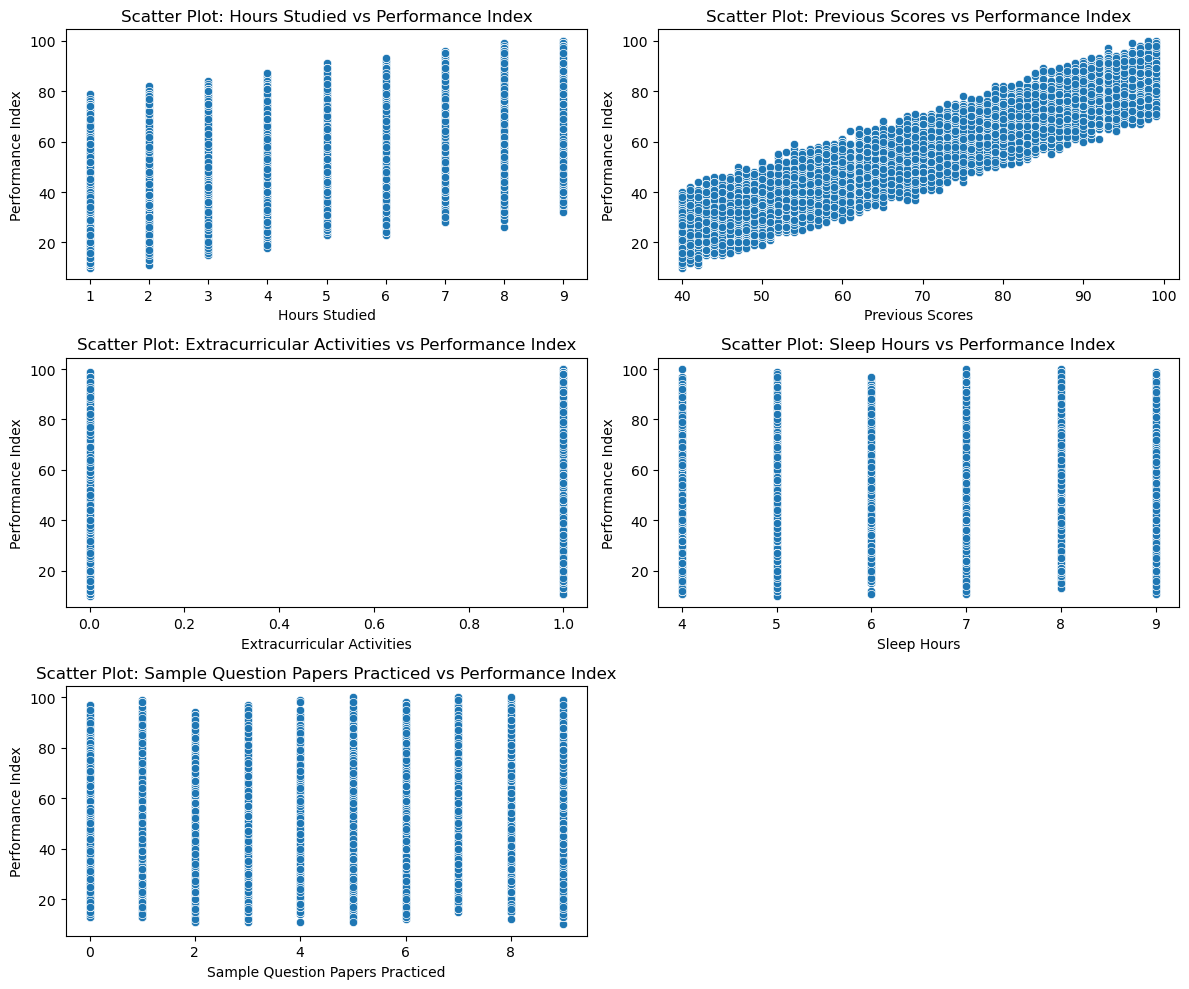

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the target variable (y)
y = df['Performance Index']

# Define the independent variables (X)
independent_vars = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 
                     'Sleep Hours', 'Sample Question Papers Practiced']

# Create scatter plots for each independent variable against Performance Index (y)
plt.figure(figsize=(12, 10))

# Loop through each independent variable and plot the scatter plot
for i, var in enumerate(independent_vars, 1):
    plt.subplot(3, 2, i)  # Create a grid of subplots (3 rows, 2 columns)
    sns.scatterplot(x=df[var], y=y)  # Scatter plot
    plt.title(f'Scatter Plot: {var} vs Performance Index')
    plt.xlabel(var)
    plt.ylabel('Performance Index')

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Display the plot
plt.show()



In [112]:
import scipy.stats as stats

# Define the independent variables (X) and the target variable (y)
X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 
        'Sleep Hours', 'Sample Question Papers Practiced']]
y = df['Performance Index']

# Convert 'Extracurricular Activities' to numeric values (since it's categorical)
X = pd.get_dummies(X, drop_first=True)

# Perform Pearson correlation test for each X variable against y (Performance Index)
for var in X.columns:
    corr_coefficient, p_value = stats.pearsonr(X[var], y)
    print(f'Correlation between {var} and Performance Index: {corr_coefficient:.4f}, p-value: {p_value:.4f}')


Correlation between Hours Studied and Performance Index: 0.3753, p-value: 0.0000
Correlation between Previous Scores and Performance Index: 0.9151, p-value: 0.0000
Correlation between Extracurricular Activities and Performance Index: 0.0261, p-value: 0.0096
Correlation between Sleep Hours and Performance Index: 0.0504, p-value: 0.0000
Correlation between Sample Question Papers Practiced and Performance Index: 0.0434, p-value: 0.0000


### Interpretation of Correlation Test Results:
#### Correlation between Hours Studied and Performance Index:
Correlation Coefficient: 0.3753
Interpretation: This indicates a moderate positive relationship between the number of hours studied and the performance index. As the hours studied increase, the performance index tends to increase as well, though the relationship is not very strong.
p-value: 0.0000
Interpretation: The p-value is less than 0.05, which means this correlation is statistically significant. There is strong evidence to suggest that hours studied have a real relationship with performance.
#### Correlation between Previous Scores and Performance Index:
Correlation Coefficient: 0.9151
Interpretation: This indicates a strong positive relationship between previous scores and the performance index. The performance index appears to be highly influenced by previous scores, suggesting that students with higher prior scores tend to perform better.
p-value: 0.0000
Interpretation: With a p-value of 0.0000, the correlation is statistically significant. The relationship between previous scores and the performance index is highly reliable and unlikely to be due to chance.
#### Correlation between Extracurricular Activities and Performance Index:
Correlation Coefficient: 0.0261
Interpretation: This indicates a very weak positive relationship between extracurricular activities and performance index. The correlation is so weak that it suggests that extracurricular activities have little to no impact on performance index.
p-value: 0.0096
Interpretation: Despite the very weak correlation, the p-value is less than 0.05, suggesting that the relationship is statistically significant. However, the weak correlation means this variable has minimal influence on performance.
#### Correlation between Sleep Hours and Performance Index:
Correlation Coefficient: 0.0504
Interpretation: This indicates a very weak positive relationship between sleep hours and performance index. While there is a slight positive trend, it is not a strong or meaningful relationship.
p-value: 0.0000
Interpretation: The p-value is less than 0.05, indicating statistical significance. However, the weak correlation suggests that while sleep hours are statistically significant, they do not have a major impact on performance.
#### Correlation between Sample Question Papers Practiced and Performance Index:
Correlation Coefficient: 0.0434
Interpretation: This indicates a very weak positive relationship between the number of sample question papers practiced and the performance index.
p-value: 0.0000
Interpretation: The p-value is less than 0.05, so the relationship is statistically significant. However, the very weak correlation suggests that practicing sample papers has a negligible effect on performance.

## Building a predictive model. 

In [113]:
# Define independent variables (X) and the target variable (y)
X = df.drop('Performance Index', axis=1)  # All columns except 'Performance Index'
y = df['Performance Index']

# Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-squared (R²): {r2:.4f}')


Mean Squared Error (MSE): 4.3059
Root Mean Squared Error (RMSE): 2.0751
R-squared (R²): 0.9884


### Results of the Model Evaluation:
#### 4.3059 is the mean squared error (MSE).
This is a comparatively tiny value, suggesting that, on average, the model's predictions closely match the actual values. The average squared difference between the expected and actual values is known as the MSE. A better model fit is indicated by a reduced MSE.
#### The root RMSE (mean squared error): 2.0751
In the same units as the goal variable (Performance Index), the RMSE provides us with an estimate of the average deviation between the projected and actual values. Given that the RMSE and Performance Index are on the same scale, this figure indicates that the average prediction error of the model is roughly 2.0751 units.
#### R2 (R-squared): 0.9884
The model explains around 98.84% of the variance in the Performance Index, according to the extremely high R2 value of 0.9884. With just roughly 1.16% of the variance not explained by the characteristics, the model is clearly very successful in predicting the target variable.



## Table of Coefficient value of X variables

In [114]:
# Get the feature names (including the dummy variables from 'Extracurricular Activities')
features = X.columns

# Create a DataFrame with feature names and their corresponding coefficients
coefficients_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})

# Add the intercept to the table using pd.concat
intercept_df = pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [model.intercept_]})
coefficients_df = pd.concat([coefficients_df, intercept_df], ignore_index=True)

# Display the coefficients table
print(coefficients_df)


                            Feature  Coefficient
0                     Hours Studied     2.851022
1                   Previous Scores     1.018430
2        Extracurricular Activities     0.573823
3                       Sleep Hours     0.472073
4  Sample Question Papers Practiced     0.188704
5                         Intercept   -33.981324


### Interpretation of Coefficients:
#### Hours Studied: 
For every additional hour of study, the Performance Index is predicted to increase by 2.85 points, assuming all other variables remain constant.
#### Previous Scores:
Each additional point in Previous Scores is associated with an increase of 1.02 points in the Performance Index.
#### Extracurricular Activities:
For every additional activity, the Performance Index is predicted to increase by 0.57 points.
#### Sleep Hours: 
Every extra hour of sleep results in an increase of 0.47 points in the Performance Index.
Sample Question Papers Practiced: Every additional paper practiced corresponds to an increase of 0.19 points in the Performance Index.
#### Intercept: 
When all other features are zero, the Performance Index is predicted to be -33.9813. This might not be realistic in practice (e.g., no studying or no scores), but it is important in the context of the linear model.

### We can observe from the coefficient values that:

With a value of 2.85, Hours Studied has the largest impact. This implies that the Performance Index rises noticeably with every extra hour of study, making it the model's most important component.
With a coefficient of 1.02, Previous Scores comes in second, suggesting that, although not as strongly as study hours, a higher previous score also has a beneficial impact on the performance index.
The lesser coefficients for extracurricular activities, sleep duration, and practiced sample question papers indicate that these factors have less of an effect on the Performance Index than do hours studied and prior scores. They still have a favorable impact and enhance performance, though.


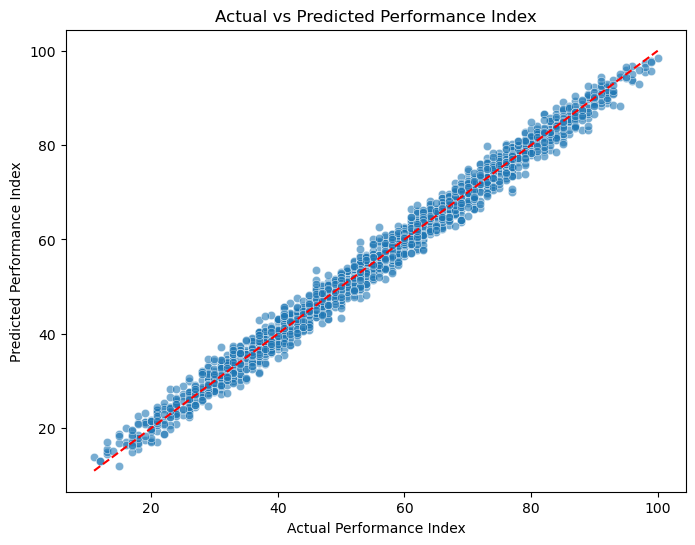

Mean Squared Error (MSE): 4.3059
Root Mean Squared Error (RMSE): 2.0751
R-squared (R²): 0.9884


In [115]:
# Plot Actual vs Predicted Performance Index
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # 45-degree line (Perfect Prediction)
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs Predicted Performance Index')
plt.show()

# Calculate error metrics
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared

# Print the error metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-squared (R²): {r2:.4f}')


### Analysis of the Findings:
### Considering the metrics given:
#### 4.3059 is the mean squared error (MSE):
The mean of the squared discrepancies between the expected and actual Performance Index values is represented by this figure.
Better model accuracy is indicated by a lower MSE. The MSE of 4.3059 in this instance indicates that the squared errors between the actual data and the predictions are generally quite minimal.
Given how low this score is, it suggests that while the model is generally producing correct predictions, there may still be some room for improvement.
#### Root Mean Squared Error (RMSE) = 2.0751: 
RMSE returns the error measure to the Performance Index's initial units by taking the square root of MSE.
With an RMSE of 2.0751, the model's forecasts for the Performance Index are, on average, wrong by about 2.08 points.
This mistake is quite minimal, suggesting that the model is operating effectively.
#### R-squared (R²) = 0.9884: 
R² quantifies the extent to which the model explains the variability in the target variable (Performance Index).
With a very high R2 value of 0.9884, the independent variables (hours studied, prior scores, etc.) account for 98.84% of the variation in the Performance Index. This suggests that the model can account for nearly all of the variance in the target variable and fits the data quite well.
An R2 value near 1 indicates that the model is successfully capturing the relationships seen in the data.




